# **[FINAL TASK] PREDICTION MODEL ID/X PARTNERS x RAKAMIN**
----------



## Latar Belakan Masalah
Dalam industri keuangan, terutama pada lembaga pemberi pinjaman seperti bank atu fintech, penilaian risiko kredit merupakan aspek krusial dalam pengambilan keputusan. Pemberian pinjaman yang tidak terukur akan membuat banyak kerugian finansial dan kestabilan perusahaan. Oleh karena itu, pengendalian risiko pinjaman sangat penting untuk dilakukan agar dapat melakukan evaluasi kelayakan pinjaman.

Untuk mengatasi tantangan ini, penerapan Machine Learning (ML) sangat diperlukan untuk dapat melakukan fungsi otomatisasi dalam melakukan evaluasi kredit dan meningkatkan akurasi. Dengan demikian, proyek ini bertujuan untuk membangun model machine learning yang mampu mengklasifikasikan risiko pinjaman secara lebih akurat, membantu lembaga keuangan dalam mengurangi kredit macet, serta mempercepat dan mengoptimalkan proses pengambilan keputusan dalam pemberian kredit.

## Data Load

In [1]:
# import kebutuhan library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample 
import xgboost as xgb
import catboost as cb
import seaborn as sns
import missingno as masno

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.figure(figsize=(11,9))

<Figure size 1100x900 with 0 Axes>

<Figure size 1100x900 with 0 Axes>

In [4]:
file_path = 'D:\Internhsip\Idx partners internship\Final  project\loan_data_2007_2014.csv'

In [5]:
# load data
df = pd.read_csv(file_path)
df.head(8)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understranding

Data ini merupakan data rekaman pinjaman dari tahun 2007 hingga 2014. Pada proses Data Understanding kita ingin melihat representasi dari setiap features yang sekiranya dapat membantu pemahaman dari data yang ada.

In [6]:
# pahami karakteristik data
# struktur dataset dari tipe data, jumlah baris dan kolom
# eksplorasi awal distribusi data, stats desc, pola data

In [7]:
# earliest_cr_line, data bulan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

> **Data terdiri dari 75 fitur dan 466285 baris.**

In [9]:
## features dengan tipe data Datetime perlu diubah
## sesuai dari data dictionary
# feature datetime yang perlu diubah:
# issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d,

### Data Time Series

In [10]:
# data ini merupakan data timeseries
# col 1 data bulan dimana pinjaman diberikan
# col 2 data bulan dimana batas kredit peminjam yang paling awal dibuka
# col 3 data bulan pembayaran terakhir yang diterima
# col 4 data bulan terakhir pinjaman ditarik
df[['issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


In [11]:
## Hubungan Data time series dengan data lainnya ##
## issue_d dengan loan_amnt/funded_amnt
## last_pymnt_d dengan last+pymnt_amnt

### Data Kategorikal

In [12]:
df['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [13]:
df[['grade']].value_counts()
# grade pinjaman -> A, B, C, D, E, F, G

grade
B        136929
C        125293
D         76888
A         74867
E         35757
F         13229
G          3322
dtype: int64

In [14]:
df[['sub_grade']].value_counts()

sub_grade
B3           31686
B4           30505
C1           26953
C2           26740
B2           26610
C3           25317
B5           25252
C4           24105
B1           22876
C5           22178
A5           21757
D1           19261
A4           19045
D2           17046
D3           14916
D4           14099
A3           12568
D5           11566
A2           10956
A1           10541
E1            9033
E2            8669
E3            6976
E4            5992
E5            5087
F1            3940
F2            3001
F3            2708
F4            2067
F5            1513
G1            1109
G2             823
G3             583
G4             422
G5             385
dtype: int64

>  **Grade diberikan oleh pihak pemberi pinjaman untuk mengukur tingkat pinjaman.**

In [15]:
df[['home_ownership']].value_counts()
# status kepemilikian rumah yang diberikan oleh peminjam saat pendaftaran

home_ownership
MORTGAGE          235875
RENT              188473
OWN                41704
OTHER                182
NONE                  50
ANY                    1
dtype: int64

> **Data peminjam banyak yang memiliki kepemilikan rumah dengan status Mortgage (KPR).**

In [16]:
df[['loan_status']].value_counts()
# status pembayaran peminjaman

loan_status                                        
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
dtype: int64

**kategori status pinjaman:**

Current
→ Pinjaman masih aktif dan pembayaran cicilan berjalan sesuai jadwal tanpa keterlambatan.

Fully Paid
→ Pinjaman telah lunas sepenuhnya, termasuk pokok dan bunga, tanpa ada tunggakan.

Charged Off
→ Pinjaman dinyatakan macet karena peminjam gagal membayar dalam jangka waktu lama, dan kreditur menghapusnya sebagai kerugian (tidak berharap pembayaran kembali).

Late (31-120 days)
→ Pinjaman telah terlambat pembayaran antara 31 hingga 120 hari, tetapi masih belum dianggap default atau macet sepenuhnya.

In Grace Period
→ Peminjam terlambat kurang dari 15 hari, tetapi masih dalam masa tenggang di mana mereka bisa membayar tanpa terkena penalti besar.

Does not meet the credit policy. Status: Fully Paid
→ Pinjaman awalnya tidak memenuhi kebijakan kredit, tetapi tetap disetujui dan telah lunas sepenuhnya.

Late (16-30 days)
→ Pinjaman terlambat pembayaran antara 16 hingga 30 hari, tetapi masih dalam tahap awal keterlambatan.

Default
→ Pinjaman masuk dalam gagal bayar (default), artinya peminjam sudah tidak membayar dalam waktu yang lama, dan kemungkinan kreditur akan mengambil langkah hukum atau menjual utang ke pihak lain.

Does not meet the credit policy. Status: Charged Off
→ Pinjaman awalnya tidak memenuhi kebijakan kredit, tetapi tetap disetujui. Namun, akhirnya dinyatakan macet (charged off) karena gagal bayar.


In [17]:
df[['verification_status']].value_counts()
# status verifikasi pinjaman

verification_status
Verified               168055
Source Verified        149993
Not Verified           148237
dtype: int64

In [18]:
df[['purpose']].value_counts()
# tujuan peminjaman

purpose           
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
dtype: int64

In [19]:
df[['initial_list_status']].value_counts()
# data status pencatatan awal pinjaman
# f = fractional (pecahan), w = whole (utuh)

initial_list_status
f                      303005
w                      163280
dtype: int64

In [20]:
df[['application_type']].value_counts()

application_type
INDIVIDUAL          466285
dtype: int64

### Data Numerik

In [21]:
# describe kolom namun kolom kosong akan disingkirkan untuk memudahkan
df.describe().dropna(axis=1, how='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [22]:
# melihat loan status keterlambatan dari pembayaran, pembayaran terakhir, bunga yang dikenakan, saldo terakhir
df[df['loan_status'] == 'Late (31-120 days)'][['funded_amnt','last_pymnt_amnt','total_pymnt','total_pymnt_inv',
    'total_rec_int','tot_cur_bal','tot_coll_amt','loan_status']]

,funded_amnt,last_pymnt_amnt,total_pymnt,total_pymnt_inv,total_rec_int,tot_cur_bal,tot_coll_amt,loan_status
607,16950,419.16,19681.28,19681.28,7790.66,NaN,NaN,Late (31-120 days)
749,20000,510.60,22954.38,22925.87,9767.18,NaN,NaN,Late (31-120 days)
1644,20000,468.17,22033.57,22006.15,7691.62,NaN,NaN,Late (31-120 days)
1918,17000,441.28,19771.80,19742.83,8661.77,NaN,NaN,Late (31-120 days)
2135,18725,300.00,21616.54,21298.76,8773.60,NaN,NaN,Late (31-120 days)
...,...,...,...,...,...,...,...,...
466053,25000,581.45,11629.00,11629.00,5135.43,324756.0,340.0,Late (31-120 days)
466067,15875,446.62,9825.64,9825.64,5943.10,41223.0,138.0,Late (31-120 days)
466179,35000,926.71,21314.33,21314.33,12244.50,459136.0,0.0,Late (31-120 days)
466216,10700,410.86,8663.60,8663.60,3266.31,51830.0,0.0,Late (31-120 days)


In [23]:
# funded_amnt : jumlah total pembayaran pinjaman sesuai perjanjian
# total_pymnt : total pembayaran yang diterima dari total yang didanai sampai saat ini
# total_pymnt_inv : total pembayaran yang diterima dari total yang didanai investor sampai saat ini
# total_rec_int : total bunga yang diterima sampai saat ini
# tot_cur_bal : total saldo disemua akun
# tot_coll_amt : total tagihan yang terhutang

In [24]:
# melihat loan status keterlambatan dari jumlah kesepakatan pinjaman, pembayaran tiap bulan, pembayaran teakhir
# sisa pokok yang terhutang, dan biaya keterlambatan pembayaran
df[(df['loan_status'] == 'Late (31-120 days)') & (df['total_rec_late_fee']!= 0)][['issue_d','funded_amnt','installment', 'last_pymnt_amnt','out_prncp','out_prncp_inv', 'loan_status','total_rec_late_fee']]

,issue_d,funded_amnt,installment,last_pymnt_amnt,out_prncp,out_prncp_inv,loan_status,total_rec_late_fee
1644,Dec-11,20000,468.17,468.17,5704.87,5697.67,Late (31-120 days),46.82
3850,Nov-11,12000,269.49,269.49,2813.20,2696.20,Late (31-120 days),30.00
5022,Oct-11,20000,494.59,494.59,5381.09,5381.09,Late (31-120 days),24.73
5434,Oct-11,25000,638.25,638.25,6976.83,6969.77,Late (31-120 days),29.39
5489,Oct-11,15000,389.36,389.36,4593.66,4585.96,Late (31-120 days),19.47
...,...,...,...,...,...,...,...,...
465148,Jan-14,30000,1018.50,2000.00,12783.19,12719.28,Late (31-120 days),50.93
465324,Jan-14,3000,111.45,111.45,1386.67,1386.67,Late (31-120 days),15.00
465898,Jan-14,7000,235.36,3453.30,34.85,34.85,Late (31-120 days),30.00
465899,Jan-14,3600,127.00,140.00,1684.39,1684.39,Late (31-120 days),15.00


In [25]:
# melihat dengan fitur yang sama namun dengan loan status Charged Off
df[df['loan_status'] == 'Charged Off'][['funded_amnt','installment', 'last_pymnt_amnt','out_prncp','out_prncp_inv', 'loan_status','total_rec_late_fee']]

,funded_amnt,installment,last_pymnt_amnt,out_prncp,out_prncp_inv,loan_status,total_rec_late_fee
1,2500,59.83,119.66,0.0,0.0,Charged Off,0.0
8,5600,152.39,152.39,0.0,0.0,Charged Off,0.0
9,5375,121.45,121.45,0.0,0.0,Charged Off,0.0
12,9000,305.38,305.38,0.0,0.0,Charged Off,0.0
14,10000,325.74,325.74,0.0,0.0,Charged Off,0.0
...,...,...,...,...,...,...,...
466254,6000,170.53,170.53,0.0,0.0,Charged Off,0.0
466256,15000,534.72,534.72,0.0,0.0,Charged Off,0.0
466276,8525,217.65,217.65,0.0,0.0,Charged Off,0.0
466277,18000,563.23,563.23,0.0,0.0,Charged Off,0.0


In [26]:
# installment : Pembayaran bulanan yang harus dibayar oleh peminjam jika pinjaman itu berasal.
# last_pymnt_amnt : Jumlah total pembayaran terakhir yang diterima
# out_prncp : Sisa pokok terutang untuk jumlah total yang didanai
# total_rec_late_fee : Biaya keterlambatan diterima sampai saat ini

## Exploratory Data Analysis (EDA)

In [27]:
# lakukan formatting awal
# hapus kolom yang tidak perlu
# ubat format term untuk dapat dilakukan
# terdapat beberapa tipe data yang bersifat object
# data ini harus  diubah di awal untuk memudahkan proses visualisasi EDA

### Feature Engineering

In [28]:
# membuat list fitur yang ingin dihapus
list_features = ['addr_state', 'desc', 'emp_title', 'title', 'url', 'zip_code']
df.drop(list_features, axis=1, inplace=True)

In [29]:
df.shape
# kolomg telah berkurang menjadi 69 kolom

(466285, 69)

### Missing Value

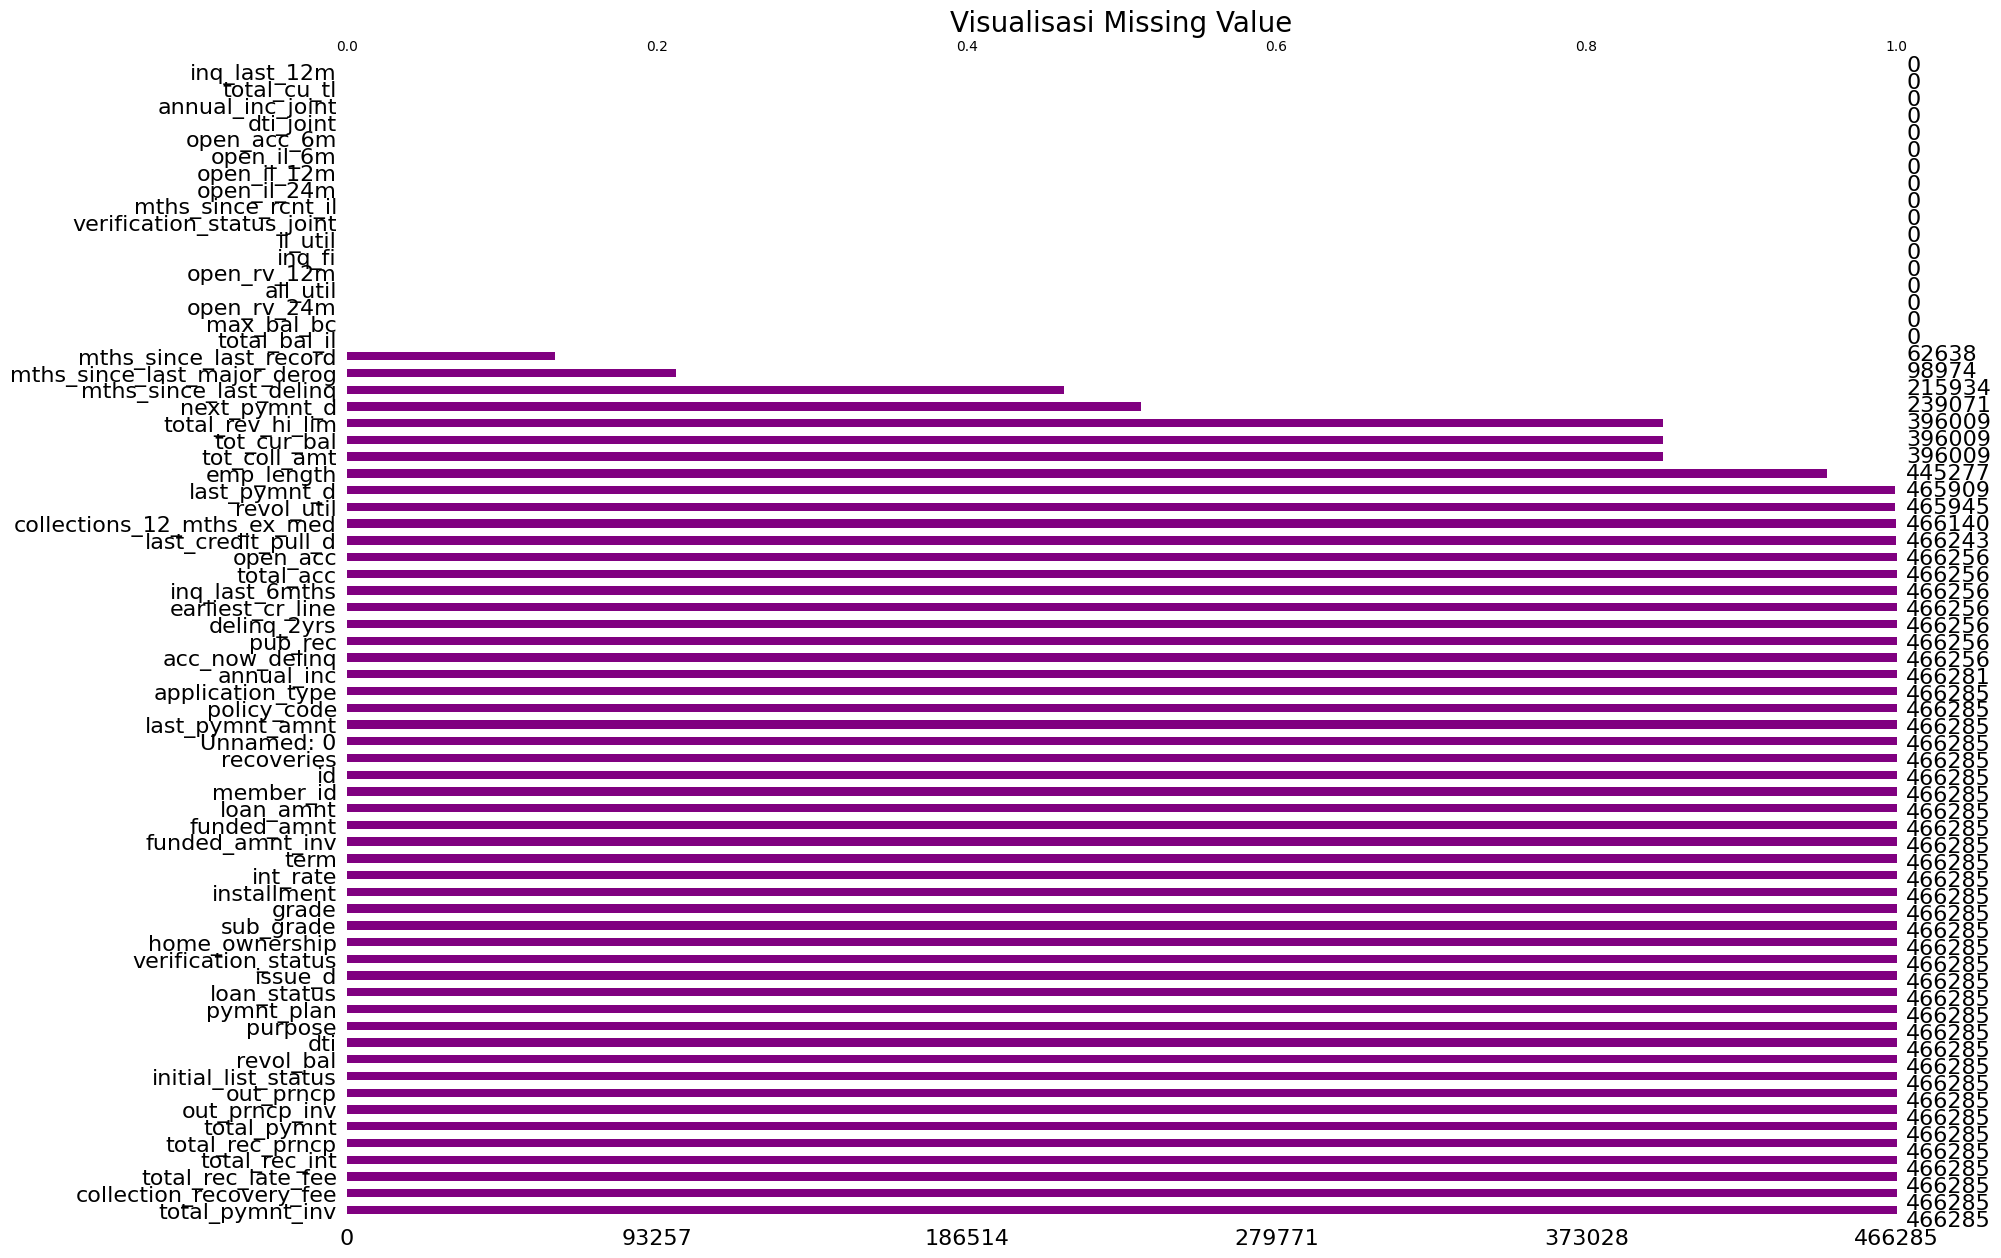

In [30]:
# visualisasi untuk melihat missing value

masno.bar(df, figsize=(20,15), sort= 'descending', color = 'purple')
plt.title('Visualisasi Missing Value', size= 20)
plt.show()

### Heatmap Korelasi

In [31]:
# sns.heatmap(df.select_dtypes(include=[np.number]).corr(), vmin=-1, vmax=1, cmap = 'BrBG')
# plt.title('Heatmap Korelasi Fitur')
# plt.show()

In [32]:
# cari rata-rata nilai int_rate pada pengaruhnya nilai grade pinjaman (misal grade A ada di rata-rata nilai int_rate berapa)

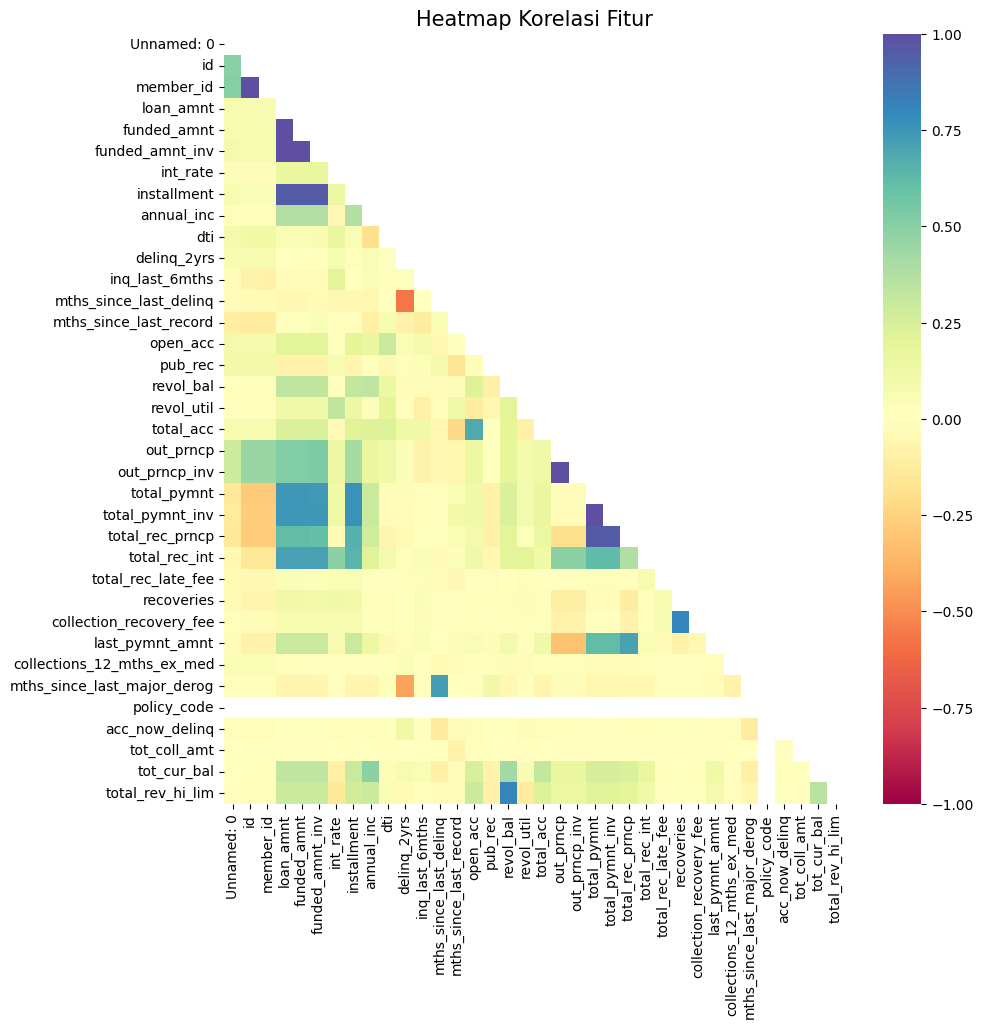

In [33]:
# untuk melihat korelasi antar fitur
plt.figure(figsize=(10,10))

# buat heatmap bentuk segitiga
# untuk melakukannya kita harus memberi nilai 0 pada korelasi yang di atas
mask = np.triu(np.ones_like(df.select_dtypes(include=[np.number]).dropna(axis=1, how='all').corr(), dtype= bool)) # np.number digunakan untuk memilih tipe data numerik

sns.heatmap(df.select_dtypes(include=[np.number]).dropna(axis=1, how='all').corr(), mask=mask, vmin=-1, vmax=1, cmap = 'Spectral') # annot=true
plt.title('Heatmap Korelasi Fitur', fontsize=15)
plt.show()

## visualisasi belum dilakukan cleaning dan formatting

### Bar Chart Analisis

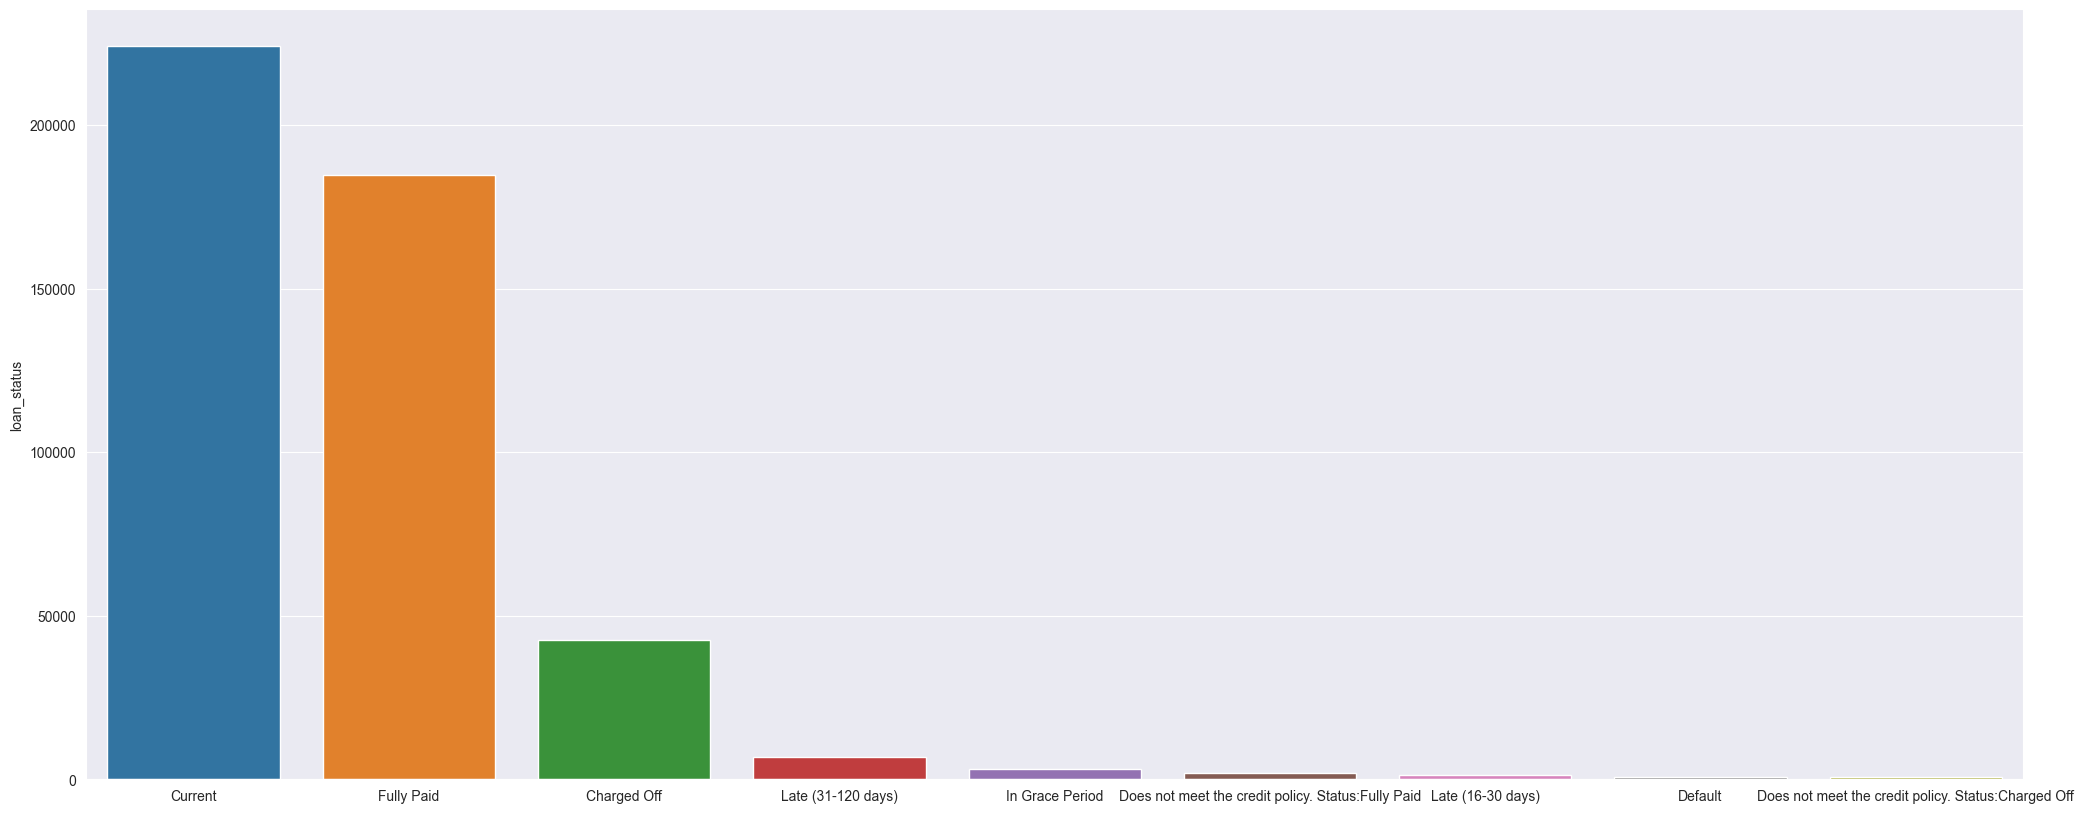

In [34]:
plt.figure(figsize=(25,10))
sns.set_style('darkgrid')
sns.barplot(x=df['loan_status'].value_counts().index, y=df['loan_status'].value_counts())
plt.show()

> Kita Bisa melihat bahwa dari segmentasi pinjaman, pinjaman yang masih aktif terlihat lebih banyak dibandingkan dengan jumlah orang yang telah melakukan pembayar full. 

In [35]:
df['loan_status'].value_counts(normalize=True) * 100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Data diatas merupakan persentase dari status pinjaman yang ada

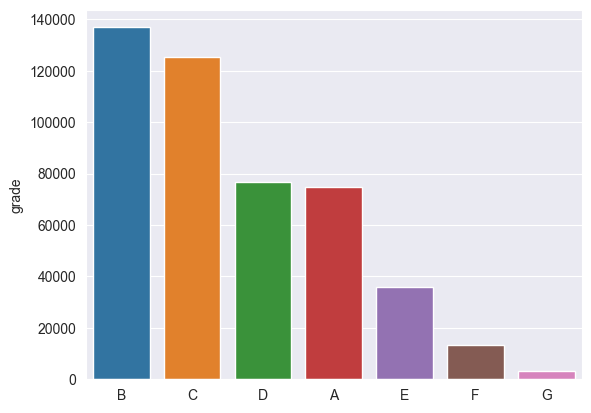

In [36]:

sns.set_style('darkgrid')
sns.barplot(x=df['grade'].value_counts().index, y=df['grade'].value_counts())
plt.show()

> Sesuai dengan grade yang ditentukan oleh peminjam, terlihat bahwa jumlah pinjaman yang terdaftar memiliki grade B. Tidak banyak pinjaman yang dimiliki dengan grade A bahkan jika dibandingkan dengan C grade A jauh lebih sedikit perbandingannya.

### Histogram Analisis

<Axes: xlabel='loan_amnt', ylabel='Count'>

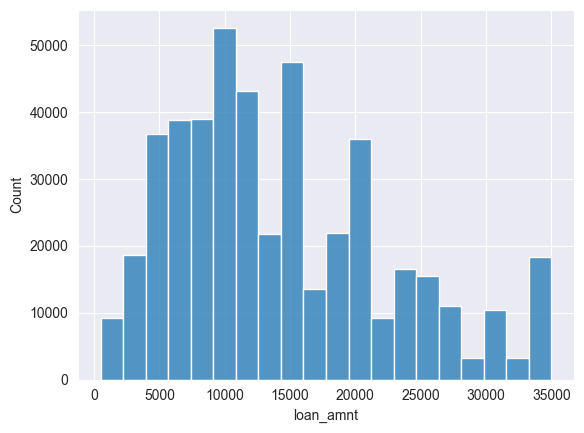

In [37]:
sns.histplot(data=df, x="loan_amnt", bins=20)

### Line Chart Analisis

In [39]:
# ubah format data yang bersifat time serires terlebih dahulu
# buat line chart untuk komposisi total pinjaman berdasarkan bulan/tahun

In [40]:
# ubah format data datetime
list_datetime_columns = ['issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# buat perulangan untuk mengubah tipe data dan format
for cols in list_datetime_columns:
  # format ingin diubah kedalam MM-YYYY
  # lita ingin melihat format data klom kita %b-%y singkatan bulan-singkatan tahun
  # megnggunakan strftime untuk mengubah fomat ke dalam MM-YYYY menggunakan %m-%Y
  df[cols] = pd.to_datetime(df[cols], format='%b-%y')
df[list_datetime_columns]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,NaT,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,NaT,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
466280,2014-01-01,2003-04-01,2016-01-01,2016-02-01,2016-01-01
466281,2014-01-01,1997-06-01,2014-12-01,NaT,2016-01-01
466282,2014-01-01,2001-12-01,2016-01-01,2016-02-01,2015-12-01
466283,2014-01-01,2003-02-01,2014-12-01,NaT,2015-04-01


> Analisis dilakukan pada data historis dari **loan_amnt (jumlah pinjaman yang dibayar)/funded_amnt (jumlah pinjaman yang komitmen untuk dibayar)** dan **issue_d (waktu dimana pinjaman didanai)** .

> Kemudian, melihat jumlah pinjaman yang telah dibayar terakahir kali pada fitur **last_pymnt_amnt** dan **last_pymnt_d**.

>

In [41]:
# df[list_datetime_columns] = df[list_datetime_columns].astype('int64')
df[list_datetime_columns].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
next_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

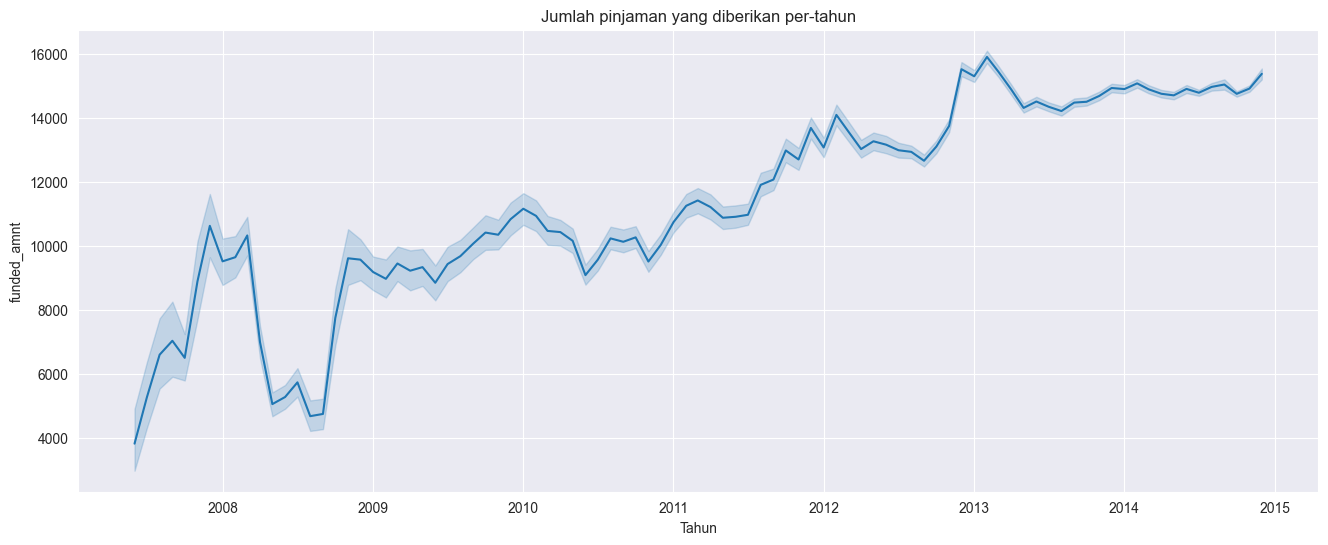

In [42]:
# melihat jumlah pinjaman yang diberikan
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.lineplot(x=df['issue_d'], y=df['funded_amnt'],linestyle='-')
# marker='o'
plt.title('Jumlah pinjaman yang diberikan per-tahun')
plt.xlabel('Tahun')
plt.show()

> **Ditahun 2008-2009** jumlah pinjaman yang terdaftar **mengalami penurunan**, kemudian pertengahan 2009-2013 jumlah pinjaman mengalami **tren yang meningkat**.
> **Puncak tertinggi** pinjaman terjadi **pada awal tahun 2013** hinga akhirnya kembali mengalami tren yang meningkat.

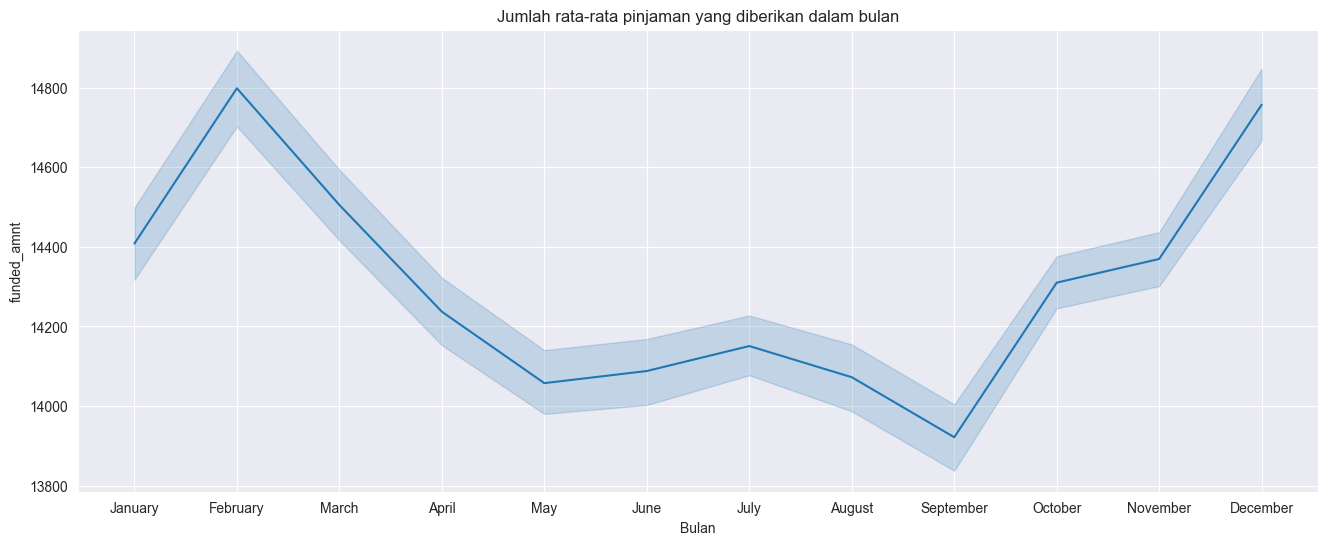

In [43]:
# melihat rata-rata jumlah pinjaman yang diberikan
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')

bulan_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

sns.lineplot(x=pd.Categorical(df['issue_d'].dt.month_name(), categories=bulan_order, ordered=True), y=df['funded_amnt'])
plt.title('Jumlah rata-rata pinjaman yang diberikan dalam bulan')
plt.xlabel('Bulan')
plt.show()

**Tren Jumlah Pinjaman**

Jika melihat loan_amnt dari jangka panjang (tahunan), terlihat bahwa jumlah pinjaman yang diberikan memiliki tren yang meningkat. Namun, jika kita melihat loan_amnt dalam jangka pendek (bulan) kita dapat melihat pola bahwa rata-rata jumlah pinjaman menurun disetiap bulan september.

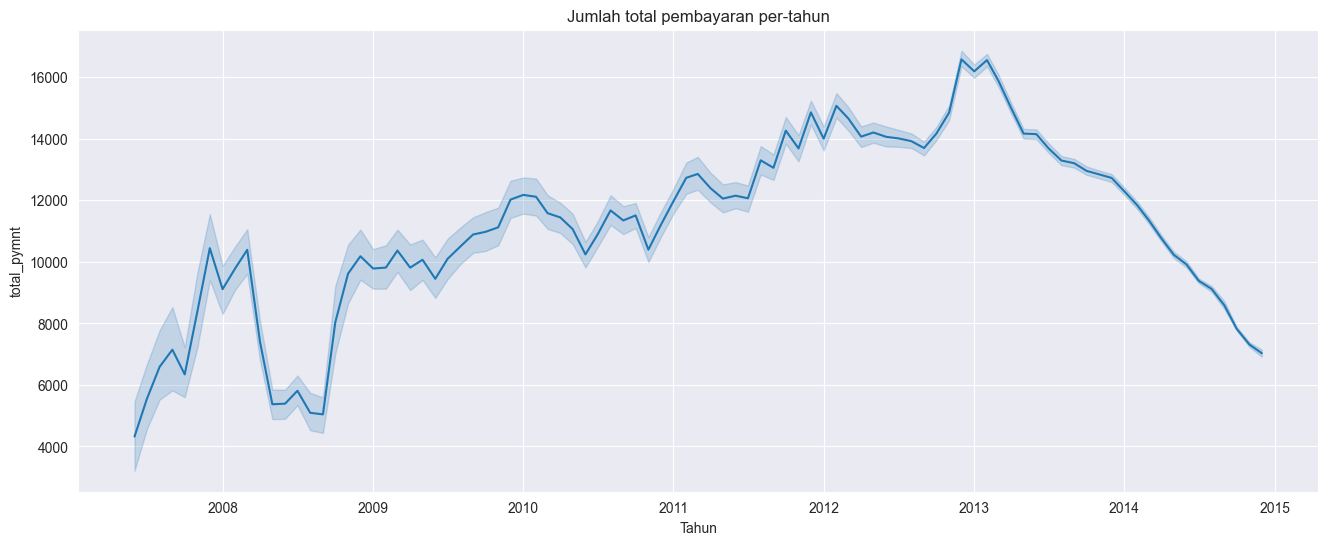

In [44]:
# melihat total jumlah pembayaran pinjaman dari tahun ke tahun
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.lineplot(x=df['issue_d'], y=df['total_pymnt'])
plt.title('Jumlah total pembayaran per-tahun')
plt.xlabel('Tahun')
plt.show()

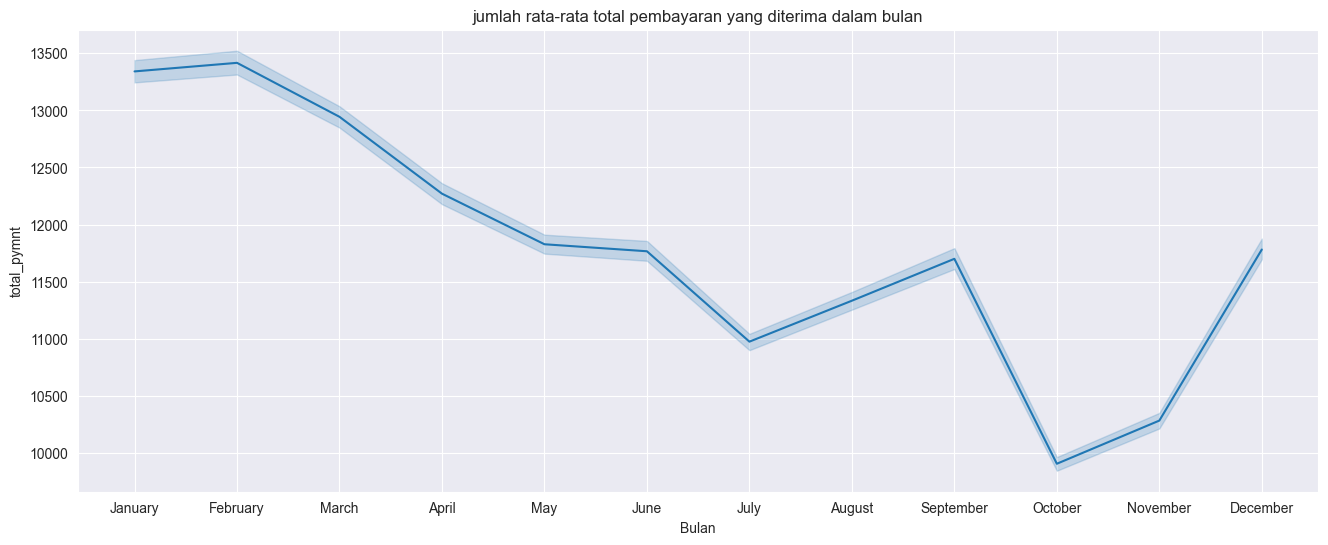

In [45]:
# melihat rata-rata jumlah pembayaran pinjaman  yang diberikan
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.lineplot(x=pd.Categorical(df['issue_d'].dt.month_name(), categories=bulan_order, ordered=True), y=df['total_pymnt'])
plt.title('jumlah rata-rata total pembayaran yang diterima dalam bulan')
plt.xlabel('Bulan')
plt.show()

**Tren pinjaman yang telah dibayar**

Jika melihat **total_pymnt** dari jangka panjang (tahunan), terlihat bahwa jumlah pinjaman yang telah diabayar memiliki tren yang meningkat pada tahun 2009-2013 namun mengalami **penurunan pada tahun 2014-2016**. Namun, jika kita melihat total_pymnt dalam jangka pendek (bulan) kita dapat melihat pola bahwa rata-rata total pembayaran sangat **tinggi di bulan januari-februari** dan selanjutnya semakin menurun hingga paling rendah berada di **bulan oktober**.

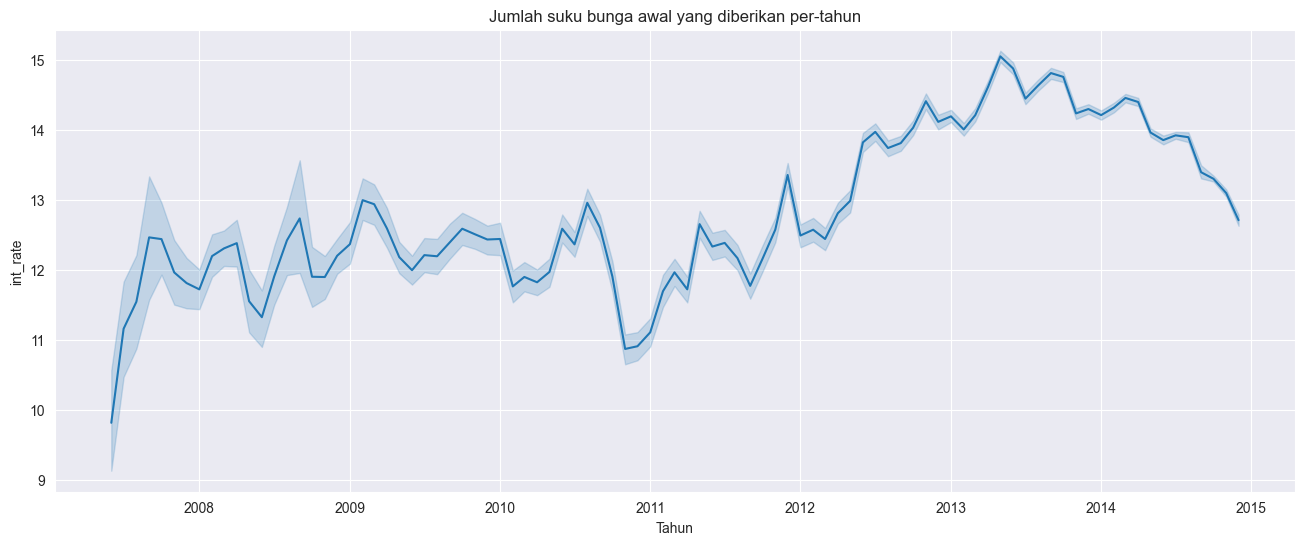

In [46]:
# melihat suku bunga yang diberikan per tahun
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.lineplot(x=df['issue_d'], y=df['int_rate'])
plt.title('Jumlah suku bunga awal yang diberikan per-tahun')
plt.xlabel('Tahun')
plt.show()

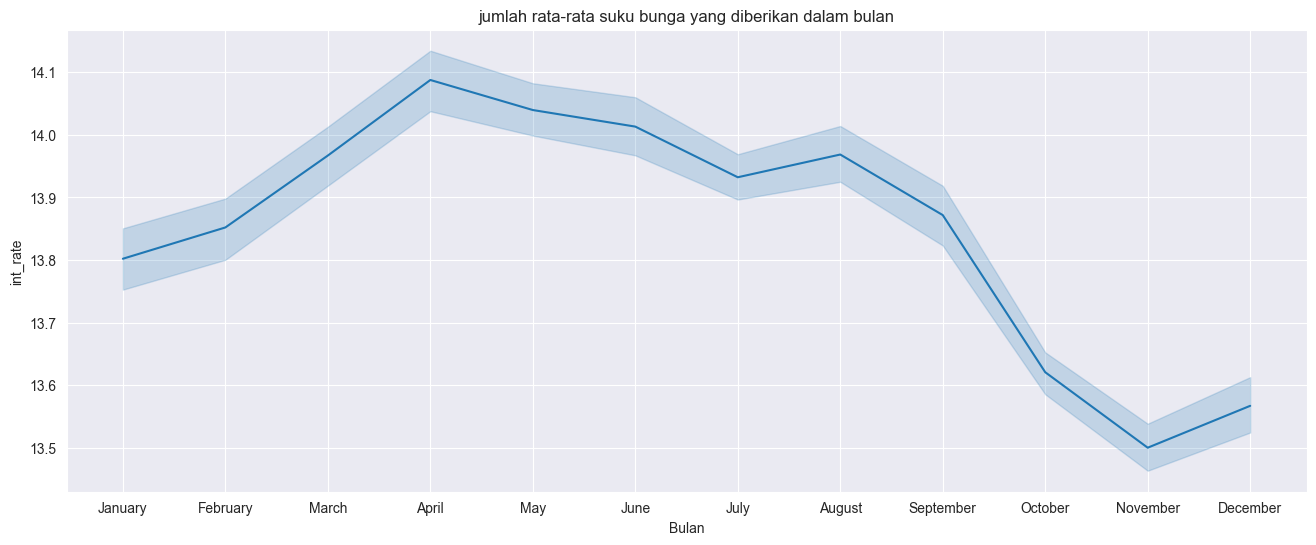

In [47]:
# melihat suku bunga yang diberikan dalam bulan
plt.figure(figsize=(16,6))
sns.lineplot(x=pd.Categorical(df['issue_d'].dt.month_name(), categories=bulan_order, ordered=True), y=df['int_rate'])
plt.xlabel('Bulan')
plt.title('jumlah rata-rata suku bunga yang diberikan dalam bulan')
plt.xlabel('Bulan')
plt.show()

**Tren pada suku bunga**

Jika melihat **int_rate dari** jangka panjang (tahunan), terlihat bahwa suku bunga yang diberikan memiliki **tren yang cukup acak**. Namun, jika kita melihat **int_rate dari** dalam jangka pendek (bulan) kita dapat melihat pola bahwa rata-rata suku bunga yang diberikan **menurun** setiap **bulan november**.

### Box Plot Analisis

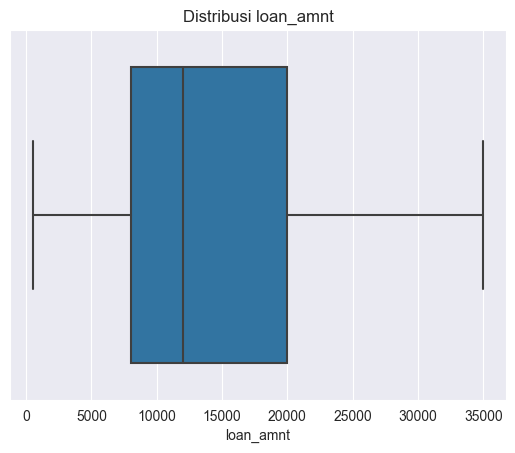

In [48]:
sns.boxplot(x=df["loan_amnt"])
plt.title('Distribusi loan_amnt')
plt.show()

**Distribusi loan_amnt**

Dari sebaran data yang bisa kita lihat pada visualisasi box-plot pada fitur loan_amnt,, terlihat data memiliki sebaran nilai yang yang merata secara keseluruhan.

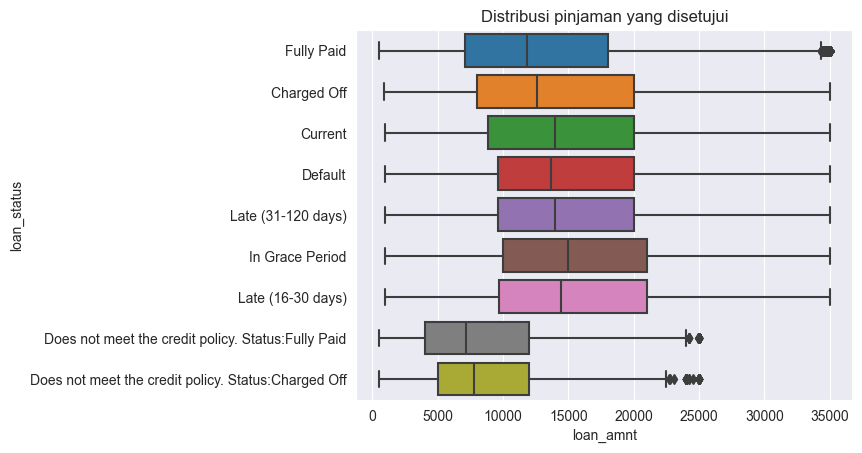

In [49]:
sns.boxplot(data=df, x="loan_amnt", y="loan_status")
plt.title('Distribusi pinjaman yang disetujui')
plt.show()

**Distribusi loan_amnt x loan_status** 

Dari sebaran data yang bisa kita lihat pada visualisasi box-plot pada fitur **loan_amnt** dengan **loan_status**, terlihat data pada status Does not meet the credit policy. : Status Fully Paid & Charged Off masih terlihat sedikit data outlier.

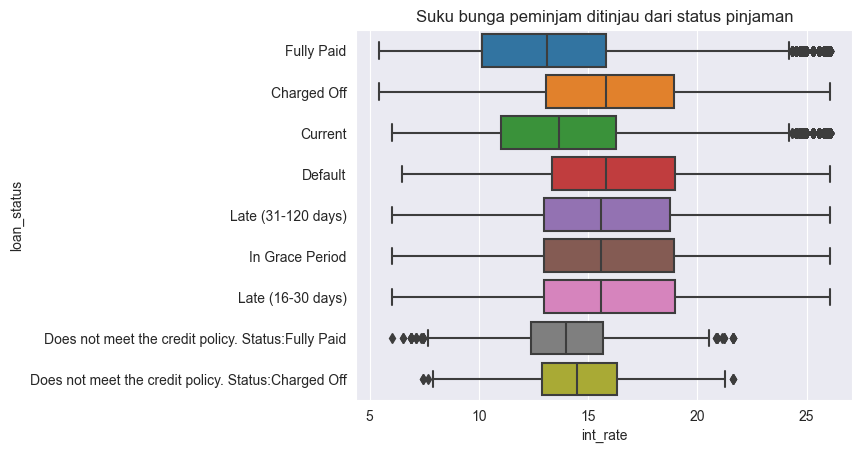

In [50]:
sns.boxplot(data=df, x='int_rate', y='loan_status')
plt.title('Suku bunga peminjam ditinjau dari status pinjaman')
plt.show()

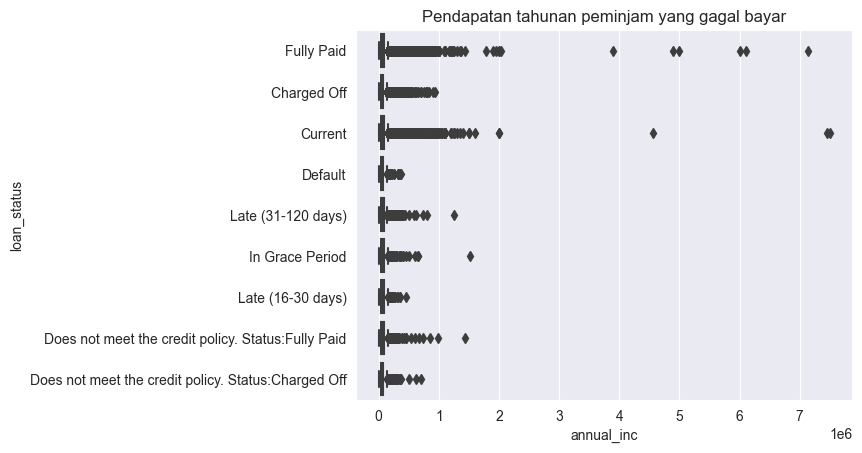

In [51]:
sns.boxplot(data=df, x='annual_inc', y='loan_status')
plt.title('Pendapatan tahunan peminjam yang gagal bayar')
plt.show()

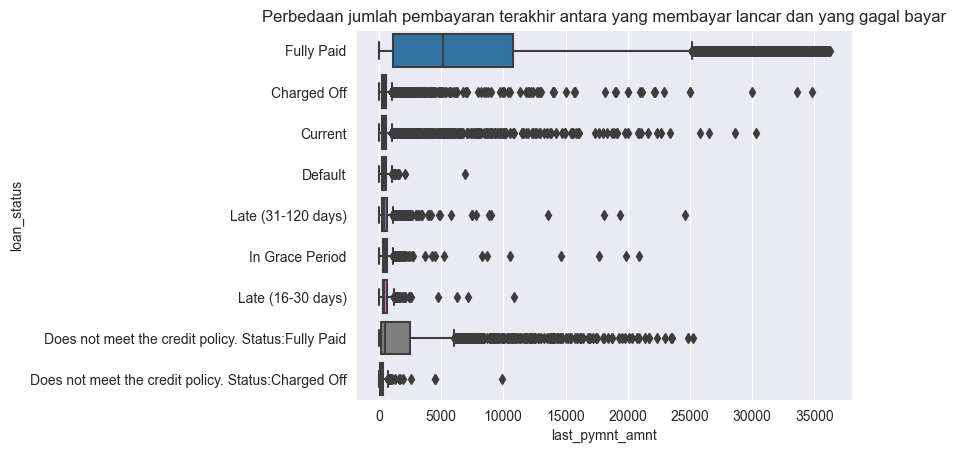

In [52]:
sns.boxplot(data=df, x='last_pymnt_amnt', y='loan_status')
plt.title('Perbedaan jumlah pembayaran terakhir antara yang membayar lancar dan yang gagal bayar')
plt.show()

## Data Preparation

In [53]:
## proses cleaning data
# hapus missing value atau isi dengan mean (jika memungkinkan)
# balancing data pada imbalance data pada beberapa fitur (gunakan oversampling, undersampling, dll)
# formatting data pada data cacat
# hapus fitur yang tidak dibtuhkan
# validasi data (cek segala data yang diperlukan)

### Data Cleaning

In [54]:
# lakukan penghapusan feature dengan data kosong
df.dropna(axis=1, how='all', inplace=True)
df.drop(['pymnt_plan'], axis=1, inplace=True)

In [55]:
# df.drop(['loan_status']==, axis=0, inplace=True)
# menghapus status pinjaman ang tidak masuk kedalam kebijakan kredit
df = df[~df.isin(['Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']).any(axis=1)]

In [56]:
df.shape

(463536, 51)

In [57]:
df[['loan_status']].value_counts()

loan_status       
Current               224226
Fully Paid            184739
Charged Off            42475
Late (31-120 days)      6900
In Grace Period         3146
Late (16-30 days)       1218
Default                  832
dtype: int64

### Feature Engineering

In [58]:
# buat feature untuk target pemodelan
# target akan dibuat dari loan_status

In [59]:
df[['loan_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   loan_status  463536 non-null  object
dtypes: object(1)
memory usage: 7.1+ MB


In [60]:
# # membuat feature target
# membuat feature target dengan klasifikasi low, moderate, high

# def classify_risk(status):
#     if status in ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid']:
#         return 0  # Low
#     elif status in ['Default', 'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period']:
#         return 1  # Moderate
#     elif status in ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']:
#         return 2  # High
#     else:
#         return None

# df['risk_category'] = df['loan_status'].apply(classify_risk)

## Penjelasan terkait kode diatas dan hasil ##
# 
# ketika melakukan encoding dengan klasifikasi target multiclass
# model tidak berjalan dengan stabil pada ketiga nilai akurasi, presisi, dan recall
# hal ini terjadi karena beberapa model tidak cocot dalam menjalankan target multiclass
# seperti logistic regression, catboost, dan adaboost
# 

In [61]:
# membuat feature target dengan klasifikasi resiko tidak beresiko dan beresiko

def classify_risk(status):
    if status in ['Fully Paid', 'Current', 'In Grace Period']:
        return 0  # tidak beresiko
    elif status in ['Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)']:
        return 1  # beresiko
    else:
        return None

df['risk_category'] = df['loan_status'].apply(classify_risk)

In [62]:
df[['risk_category']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   risk_category  463536 non-null  int64
dtypes: int64(1)
memory usage: 7.1 MB


Targel label akan melakukan klasifikasi biner dengan nilai 0 berarti tidak berisiko dan 1 berarti berisiko yang diambil melalui data loan_status sebagai dasar untuk melakukan klasifikasi label target.

In [64]:
# feature yang perlu dilakukan formatting
# term
# df['term'] = df['term'].str.extract('(\d+)').astype(int)
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [65]:
# lakukan encoding pada data kategorikal

# ada dua encoding yang dilakukan
# pertama, label encoding untuk melakuknan encoding pada data ordinal yang memiliki hirarki
# kedua, target encoding untuk melakukan encoding pada data yang tidak memiliki hirarki

# list feature untuk label encoding
list_labelEncod = ['term','grade','sub_grade'] # ordinal
# listfeature untuk target encoding
list_targetEncod = ['purpose', 'verification_status', 'home_ownership', 'application_type', 'initial_list_status'] # nominal

In [66]:
df[['grade']].value_counts()

grade
B        136575
C        124664
D         76197
A         74769
E         35221
F         12982
G          3128
dtype: int64

In [67]:
# inisiasi label encoder
le = LabelEncoder()

# melakukan label encoder apada label yang ingin dilakukan
df[list_labelEncod] = df[list_labelEncod].apply(le.fit_transform)

# melakukan target encoding
for col in list_targetEncod:
    mean_target = df.groupby(col)['risk_category'].mean()  # Buat mapping nilai rata-rata
    df[col] = df[col].map(mean_target)  # Map

In [68]:
df[list_labelEncod]

,term,grade,sub_grade
0,0,1,6
1,1,2,13
2,0,2,14
3,0,2,10
4,1,1,9
...,...,...,...
466280,1,2,11
466281,1,3,19
466282,1,3,15
466283,0,0,3


In [69]:
df[list_targetEncod]

,purpose,verification_status,home_ownership,application_type,initial_list_status
0,0.087953,0.129745,0.127653,0.110941,0.121100
1,0.089068,0.106932,0.127653,0.110941,0.121100
2,0.215120,0.093535,0.127653,0.110941,0.121100
3,0.138313,0.106932,0.127653,0.110941,0.121100
4,0.138313,0.106932,0.127653,0.110941,0.121100
...,...,...,...,...,...
466280,0.115506,0.106932,0.097601,0.110941,0.092259
466281,0.115506,0.129745,0.097601,0.110941,0.121100
466282,0.115506,0.129745,0.097601,0.110941,0.121100
466283,0.087953,0.129745,0.110653,0.110941,0.092259


### Sampling

In [70]:
# # lakukan pengambilan sampel dengan sampling dengan menggunakan metode bagging 
# # lakukan sampling dengan rasio 80% dari data original

# # inisiasi data model dan target
X = df.drop(columns=['loan_status', 'risk_category','issue_d','earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']) # data model
X = X.fillna(0)
y = df['risk_category'] # target

# # melakukan standar scaler untuk memudahkan dalam pemodelan khususnya logistic regression
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # melakukan split data dengan pengambilan sampel 80% train dan 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# **2. Pembagian Data Train-Test (80:20)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **3. Sampling dengan Bagging (Bootstrap 80%)**
X_train_bag, y_train_bag = resample(X_train, y_train, replace=True, n_samples=int(0.8 * len(X_train)), random_state=42)

# **4. Standarisasi Data HANYA pada X_train_bag**
scaler = StandardScaler()
X_train_bag = scaler.fit_transform(X_train_bag)
X_test = scaler.transform(X_test)  # Gunakan transformasi yang sama untuk test

# **5a. Reduksi Dimensi dengan PCA (Menjaga 95% Variance)**
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_bag)
X_test_pca = pca.transform(X_test)  # Transform test data juga

print(f"Dimensi setelah PCA: {X_train_pca.shape[1]}")  # Cek jumlah fitur setelah reduksi


Dimensi setelah PCA: 26


In [72]:
# **5b. Alternatif: Seleksi Fitur dengan SelectKBest (Top 20 Fitur)**
k = 20  # Ambil 20 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_bag, y_train_bag)
X_test_kbest = selector.transform(X_test)

print(f"Dimensi setelah SelectKBest: {X_train_kbest.shape[1]}")  # Cek jumlah fitur setelah reduksi


Dimensi setelah SelectKBest: 20


## Data Modelling

In [73]:
# **6. Inisiasi Model yang Digunakan**
models = {
    "Logistic Regression": LogisticRegression(solver='saga', penalty='l1', C=10, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    "CatBoost": cb.CatBoostClassifier(verbose=0, iterations=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=50)
}

# **7. Evaluasi Model dengan Cross-Validation (Menggunakan PCA atau SelectKBest)**
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# **Gunakan salah satu: PCA atau SelectKBest**
X_train_final = X_train_pca  # Ganti dengan X_train_kbest jika ingin SelectKBest
X_test_final = X_test_pca  # Ganti dengan X_test_kbest jika ingin SelectKBest

for name, model in models.items():
    scores = cross_validate(model, X_train_final, y_train_bag, cv=cv, 
                            scoring=['accuracy', 'precision_macro', 'recall_macro'], 
                            return_train_score=False)
    
    results[name] = {
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision_macro'].mean(),
        'recall': scores['test_recall_macro'].mean()
    }

    # **8. Print Hasil Evaluasi**
    print(f"{name}: Mean Accuracy = {results[name]['accuracy']:.4f}")
    print(f"{name}: Mean Precision = {results[name]['precision']:.4f}")
    print(f"{name}: Mean Recall = {results[name]['recall']:.4f}")
    print("="*50)

Logistic Regression: Mean Accuracy = 0.9562
Logistic Regression: Mean Precision = 0.9712
Logistic Regression: Mean Recall = 0.8057
Decision Tree: Mean Accuracy = 0.9472
Decision Tree: Mean Precision = 0.8635
Decision Tree: Mean Recall = 0.8721
Random Forest: Mean Accuracy = 0.9655
Random Forest: Mean Precision = 0.9754
Random Forest: Mean Recall = 0.8485
XGBoost: Mean Accuracy = 0.9627
XGBoost: Mean Precision = 0.9701
XGBoost: Mean Recall = 0.8382
CatBoost: Mean Accuracy = 0.9588
CatBoost: Mean Precision = 0.9668
CatBoost: Mean Recall = 0.8209
AdaBoost: Mean Accuracy = 0.9341
AdaBoost: Mean Precision = 0.9400
AdaBoost: Mean Recall = 0.7135


Dari hasil modeling bisa kita lihat bahwa metriks penilaian dari seluruh model terdapat Accuracy, Precision, dan Recall. 

Dari keseluruhan model yang di evaluasi, model Logistic Regression dan Random Forest memiliki performa yang tinggi dibandingkan dengan model lainnya. Sedangkan AdaBoost menjadi model yang memiliki performa paling rendah.

Dengan nilai  Accuracy mencapai 0.96 pada keduanya, dan Precision mencapai 0.97 dan Recall yang cukup walaupun bukan yang terbaik diantara model lainnya.

## Evaluation

Pemberitahuan penting! hasil dari model ini mungkin saja dipengaruhi oleh adanya ketidakseimbangan kelas pada data yang digunakan pada pemodelan prediksi ini, sehingga dalam implementasinya banyak melakukan tuning pada model yang digunakan.

Dari hasil yang model yang telah dilakukan, ditemukan bahwa Logistic Regression dan Random Forest memiliki tingkaat akurasi yang tinggi. dan AdaBoost memiliki tingkat akurasi yang paling rendah. Ketepatan (precision) pada model Logistic Regression dan Random forest memiliki nilai yang paling tinggi yang artinya model mampu membedakan prediksi target dengan tepat. Jika melihat nilai Recall Decision Tree (0.8717) memiliki recall tertinggi, artinya model lebih banyak mendeteksi pinjaman berisiko dan lebih sedikit false negatives.

### Conclusion

**Manakah model yang mungkin cocok?**

Jika perusahaan lebih mengutamakan keamanan dan ingin mendeteksi sebanyak mungkin pinjaman berisiko, Decision Tree atau Random Forest adalah pilihan terbaik.
Jika perusahaan ingin memastikan hanya benar-benar pinjaman berisiko yang ditolak, Logistic Regression atau Random Forest lebih cocok.